## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [ ]:
!pip install openpyxl

In [2]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [3]:
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [ ]:
type(mortality_data)

In [ ]:
mortality_data.info()

In [ ]:
%matplotlib inline

In [ ]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [ ]:
mortality_data

In [ ]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
mortality_data[['Age Group','Year']].value_counts()

### Save and restore a DataFrame

In [ ]:
mortality_data.to_pickle('mortality_data.pkl')

In [ ]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [ ]:
mortality_data.head()

## Examine and clean the data

In [ ]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

### Use the columns attribute to replace spaces with nothing


In [10]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [ ]:
mortality_data.head()

In [ ]:
mortality_data.describe().T

In [ ]:
mortality_data.describe(include="O").T

In [ ]:
mortality_data.AgeGroup.value_counts()

In [ ]:
len(mortality_data.DeathRate.value_counts())

In [12]:
import numpy as np
mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

<AxesSubplot:>

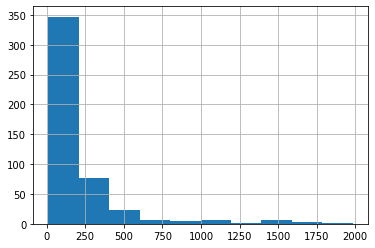

In [11]:
mortality_data.DeathRate.hist()

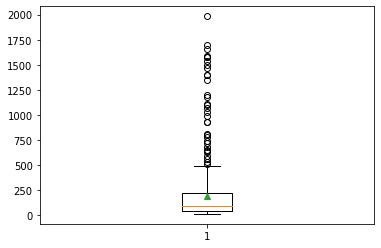

In [25]:
plt.boxplot(mortality_data["DeathRate"], showmeans=True)
plt.show()

<AxesSubplot:>

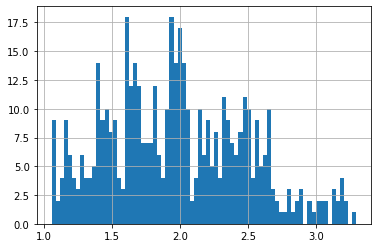

In [28]:
#normal distribution  mean = median = mode
mortality_data.death_log.hist(bins=75)
#multimodal

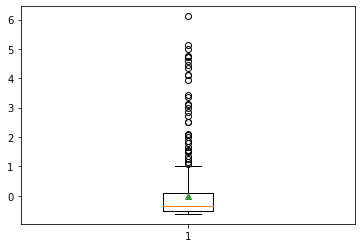

In [26]:
from scipy import stats
mortality_data["death_Zscore"] = stats.zscore(mortality_data.DeathRate)
plt.boxplot(mortality_data["death_Zscore"], showmeans=True)
plt.show()

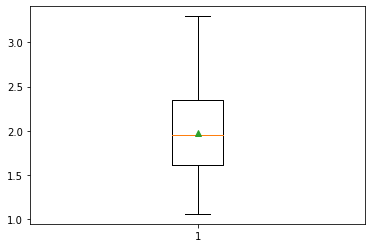

In [24]:

plt.boxplot(mortality_data["death_log"], showmeans=True)
plt.show()

In [ ]:
mortality_data.death_log.hist(bins=5)

In [ ]:
mortality_data.describe(include='O')

In [ ]:
mortality_data.describe().T

## Access the data

In [ ]:
mortality_data.hist()

In [ ]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'").hist()

In [ ]:
mortality_data.query('Year == 1900 or Year == 2000').head()

In [ ]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

### Access a subset of rows and columns

In [ ]:
mortality_data.query('Year == 1900').DeathRate.head()

In [ ]:
mortality_data.query('Year == 1900')['DeathRate'].head()

In [ ]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

### Apply statistical methods

In [ ]:
#mean = sum of values / count of case/observation
md_mu = mortality_data["DeathRate"].mean()

In [ ]:
md_sigma = mortality_data["DeathRate"].std()

In [ ]:
#95% confidence interval is mean +/- 2 stdev
print ("95% confidence interval is deathrate is {} +/- {}".format(round(md_mu,2),2*round(md_sigma,2)))

In [ ]:
mortality_data['outlier'] = mortality_data['DeathRate'].apply( 
    lambda x: 
        True 
            if 
                ( 
                    x > (md_mu + 2*md_sigma ) 
                    or 
                    x < (md_mu - 2*md_sigma)
                )  
            else 
        False )


In [ ]:
mortality_data.outlier.value_counts()

In [ ]:
# line you draw for equal number of cases on either side
mortality_data.DeathRate.median()

In [ ]:
mortality_data[['AgeGroup','DeathRate']].max()

In [ ]:
mortality_data.count()

In [ ]:
[i/20 for i in range(0,20)]

In [ ]:
mortality_data.quantile(0.5)

In [ ]:
len(mortality_data)

In [ ]:
mortality_data

In [14]:
#bins of 20 percentile cuts
mort_dist = mortality_data.quantile([i/20 for i in range(0,20)])
mort_dist

,Year,DeathRate,death_log
0.00,1900.00,11.400,1.056905
0.05,1905.75,15.050,1.177529
0.10,1911.50,21.500,1.332438
0.15,1917.25,26.350,1.420778
0.20,1923.00,31.800,1.502427
0.25,1929.00,40.575,1.608258
0.30,1935.00,45.050,1.653688
0.35,1941.00,51.275,1.709904
0.40,1947.00,63.800,1.804821
0.45,1953.00,80.050,1.903349


In [16]:

mort_dist["quantile"] = mort_dist.index
mort_dist



,Year,DeathRate,death_log,quantile
0.00,1900.00,11.400,1.056905,0.00
0.05,1905.75,15.050,1.177529,0.05
0.10,1911.50,21.500,1.332438,0.10
0.15,1917.25,26.350,1.420778,0.15
0.20,1923.00,31.800,1.502427,0.20
0.25,1929.00,40.575,1.608258,0.25
0.30,1935.00,45.050,1.653688,0.30
0.35,1941.00,51.275,1.709904,0.35
0.40,1947.00,63.800,1.804821,0.40
0.45,1953.00,80.050,1.903349,0.45


In [9]:
mortality_data["Death Rate"]

0      1983.8
1      1695.0
2      1655.7
3      1542.1
4      1591.5
        ...  
471      45.5
472      48.3
473      51.2
474      51.5
475      49.2
Name: Death Rate, Length: 476, dtype: float64

<AxesSubplot:xlabel='death_log'>

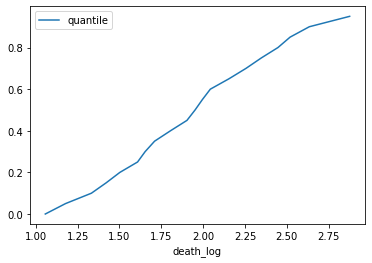

In [17]:
mort_dist.plot.line(y="quantile", x = "death_log")

In [ ]:
mort_dist.plot.line(y="quantile", x = "death_log")

In [ ]:
# compare with SUM() OVER in SQL
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()
mortality_data

In [ ]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [ ]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [ ]:
#mortality_data.head(4)
mortality_data.MeanCentered.describe()

In [ ]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [ ]:
mortality_data.head(4)

## Shape the data

### Set and use an index

In [69]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,,,,,,
1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


In [70]:
len(mortality_data)

476

In [71]:
mortality_data.reset_index(inplace=True)
mortality_data

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584
2,1902,1-4 Years,0.016557,3.218982,True,5334.5,1462.77584
3,1903,1-4 Years,0.015421,3.188113,True,6876.6,1349.17584
4,1904,1-4 Years,0.015915,3.201807,True,8468.1,1398.57584
...,...,...,...,...,...,...,...
471,2014,15-19 Years,0.000455,1.658011,False,91631.7,-147.42416
472,2015,15-19 Years,0.000483,1.683947,False,91680.0,-144.62416
473,2016,15-19 Years,0.000512,1.709270,False,91731.2,-141.72416
474,2017,15-19 Years,0.000515,1.711807,False,91782.7,-141.42416


In [73]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
mortality_data = mortality_data.set_index('Year', verify_integrity=True)
#mortality_data

ValueError: Index has duplicate keys: Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year', length=119)

In [74]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,AgeGroup,,,,,
1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


In [75]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


### Pivot the data

In [76]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values=['DeathRate','MeanCentered'])
mortality_wide.head(3)

DeathRate                                   MeanCentered              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years 10-14 Years   
Year                                                                            
1900      0.019838    0.002983    0.004848  0.004661   1790.87584   105.37584   
1901      0.016950    0.002736    0.004544  0.004276   1502.07584    80.67584   
1902      0.016557    0.002525    0.004215  0.004033   1462.77584    59.57584   

                                 
AgeGroup 15-19 Years  5-9 Years  
Year                             
1900       291.87584  273.17584  
1901       261.47584  234.67584  
1902       228.57584  210.37584

In [78]:
len(mortality_wide)

119

In [79]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           1-4 Years  10-14 Years  15-19 Years  5-9 Years
Year MeanCentered                                                
1900 105.37584           NaN     0.002983          NaN        NaN
     273.17584           NaN          NaN          NaN   0.004661
     291.87584           NaN          NaN     0.004848        NaN

In [80]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   death_log              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years 1-4 Years 10-14 Years   
Year                                                                         
1900      0.019838    0.002983    0.004848  0.004661  3.297498    2.474653   
1901      0.016950    0.002736    0.004544  0.004276  3.229170    2.437116   
1902      0.016557    0.002525    0.004215  0.004033  3.218982    2.402261   

                                 outlier                                    \
AgeGroup 15-19 Years 5-9 Years 1-4 Years 10-14 Years 15-19 Years 5-9 Years   
Year                                                                         
1900        2.685563  2.668479      True       False       False     False   
1901        2.657438  2.631038      True       False       False     False   
1902        2.624798  2.605628      True       False       False     False   

         CumDeathRate                                   MeanCentered  \
AgeGroup    1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years   
Year                                                                   
1900           1983.8     59864.0     71209.1   46070.0   1790.87584   
1901           3678.8     60137.6     71663.5   46497.6   1502.07584   
1902           5334.5     60390.1     72085.0   46900.9   1462.77584   

                                             
AgeGroup 10-14 Years 15-19 Years  5-9 Years  
Year                                         
1900       105.37584   291.87584  273.17584  
1901        80.67584   261.47584  234.67584  
1902        59.57584   228.57584  210.37584

In [81]:
mortality_wide.to_csv("mortality_wide.csv")

In [82]:
mortality_wide.shape

(119, 20)

### Melt the data

In [83]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033


In [84]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,0.019838,0.002983,0.004848,0.004661
1,1901,0.016950,0.002736,0.004544,0.004276
2,1902,0.016557,0.002525,0.004215,0.004033
3,1903,0.015421,0.002682,0.004341,0.004147


In [85]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,0.019838
1,1901,1-4 Years,0.016950
...,...,...,...
236,2017,5-9 Years,0.000116
237,2018,5-9 Years,0.000115


## Analyze the data

### Group the data

In [86]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959.0,0.003832,2.193591,0.193277,37353.117647,190.301891
10-14 Years,1959.0,0.000938,1.772540,0.000000,67911.569748,-99.154412
15-19 Years,1959.0,0.001774,2.134860,0.000000,85460.104202,-15.549370
5-9 Years,1959.0,0.001173,1.795091,0.000000,56497.440336,-75.598109


In [87]:
mortality_data.groupby('AgeGroup').median()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959.0,0.001091,2.037825,0.0,42409.4,-83.82416
10-14 Years,1959.0,0.000446,1.649335,0.0,69110.8,-148.32416
15-19 Years,1959.0,0.001069,2.028978,0.0,87096.4,-86.02416
5-9 Years,1959.0,0.000484,1.684845,0.0,58040.5,-144.52416


In [88]:
mortality_data.groupby('Year').median().head(4)

,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,,,,,
1900,0.004755,2.677021,0.0,52967.00,282.52584
1901,0.004410,2.644238,0.0,53317.60,248.07584
1902,0.004124,2.615213,0.0,53645.50,219.47584
1903,0.004244,2.627662,0.0,53986.95,231.47584


In [89]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  death_log  outlier  CumDeathRate  MeanCentered
Year AgeGroup                                                              
1900 1-4 Years            1          1        1             1             1
     10-14 Years          1          1        1             1             1
     15-19 Years          1          1        1             1             1
     5-9 Years            1          1        1             1             1
1901 1-4 Years            1          1        1             1             1

### Aggregate the data

In [90]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                        
                 mean    median       min       max       std
AgeGroup                                                     
1-4 Years    0.003832  0.001091  0.000240  0.019838  0.005005
10-14 Years  0.000938  0.000446  0.000139  0.003751  0.000884
15-19 Years  0.001774  0.001069  0.000448  0.007774  0.001384
5-9 Years    0.001173  0.000484  0.000114  0.004661  0.001275

In [91]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [92]:
AgeGS["DeathRate"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [93]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [94]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,0.000043,4


In [95]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

In [96]:
fun_1q(mortality_data)

Year             1989.000000
DeathRate           0.002226
death_log           2.347475
outlier             0.000000
CumDeathRate    70845.500000
MeanCentered       29.650840
Name: 0.75, dtype: float64

In [97]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    0.005773
Name: 0.75, dtype: float64

## Visualize the data

In [98]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<AxesSubplot:>

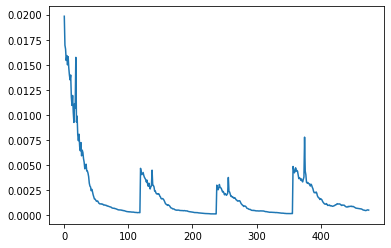

In [99]:
mortality_data['DeathRate'].plot()

<AxesSubplot:xlabel='Year'>

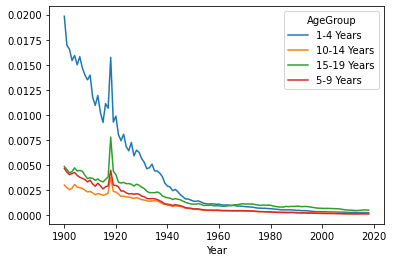

In [100]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [101]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])

,mean,median,std
AgeGroup,,,
1-4 Years,0.003832,0.001091,0.005005
10-14 Years,0.000938,0.000446,0.000884
15-19 Years,0.001774,0.001069,0.001384
5-9 Years,0.001173,0.000484,0.001275


<AxesSubplot:ylabel='AgeGroup'>

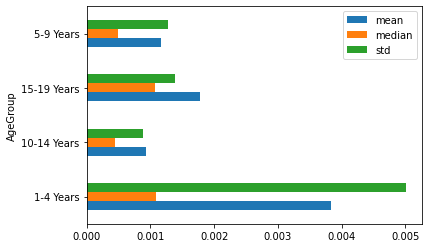

In [102]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

In [103]:
import seaborn as sns

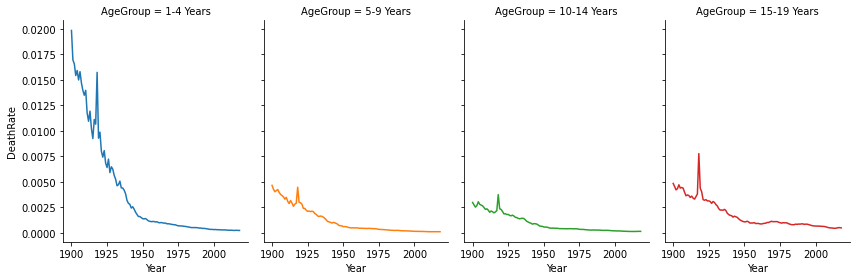

In [108]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=.75, 
            col='AgeGroup', col_wrap=4, legend=False)